In [1]:
# Initialisation

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split

%matplotlib inline

Using TensorFlow backend.


In [3]:
# Helper functions

In [4]:
def plot_data(X, y):
    plt.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
    plt.show()

def plot_decision_boundary_with_data(model, X, y, resolution=50):
    # get data range
    h_min, v_min = X.min(axis=0)
    h_max, v_max = X.max(axis=0)
    
    # subdivide the space and create a matrix of points to draw the prediction contour
    h_points = np.linspace(h_min, h_max, resolution)
    v_points = np.linspace(v_min, v_max, resolution)
    
    h_coords, v_coord = np.meshgrid(h_points, v_points)
    background_points = np.c_[h_coords.ravel(), v_coord.ravel()]
    
    predicted_points = model.predict(background_points)
    Z = predicted_points.reshape(h_coords.shape) # reshape to the range of points, but how?

    # size the image and draw the contour + points
    plt.figure(figsize=(12, 8))
    plt.contourf(h_coords, v_coord, Z, cmap='bwr', alpha=0.3)
    plot_data(X, y)

In [5]:
# Generate sample data and split into train and test sets

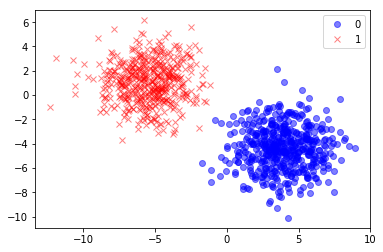

In [6]:
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=1.8, random_state=123)
plot_data(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [7]:
# Generate and train a Model

In [8]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.03), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, verbose=False)
print(model.evaluate(X_test, y_test))

250/250 [==============================] - 0s 85us/step
[0.002818762241047807, 1.0]


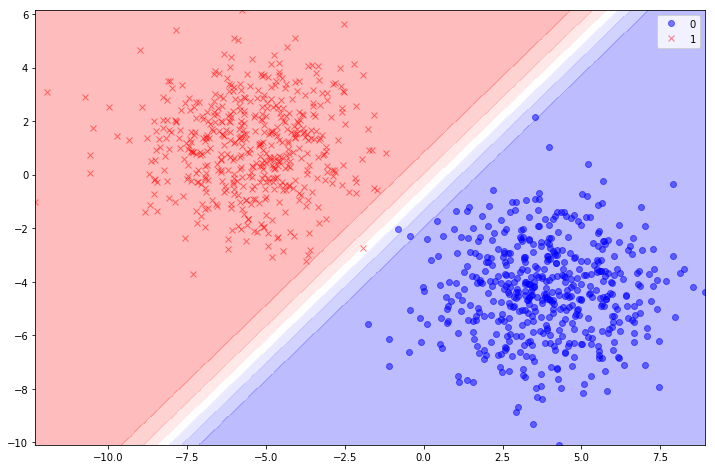

In [9]:
plot_decision_boundary_with_data(model, X, y)